# 514B

In [9]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from util.preprocess.shape import apply_perspective_transform, convert_to_grayscale, resize_images, normalize_min_max, binarize_images
from util.plot import plot_random_images

In [11]:
root_data_dirpath = Path('/workspace/deformation-prediction-multi-environment/data')
preprocessed_data_dirpath = root_data_dirpath / 'preprocessed'
resampled_data_dirpath = preprocessed_data_dirpath / 'resampled'

In [12]:
images = np.load(resampled_data_dirpath / 'images_514B_resampled.npy')

# Perspective Transform

In [13]:
sample_image = images[0]

In [14]:
sample_image.shape

(240, 320, 3)

In [62]:
corners = [(171, 96), (296, 109), (275, 228), (157, 211)]

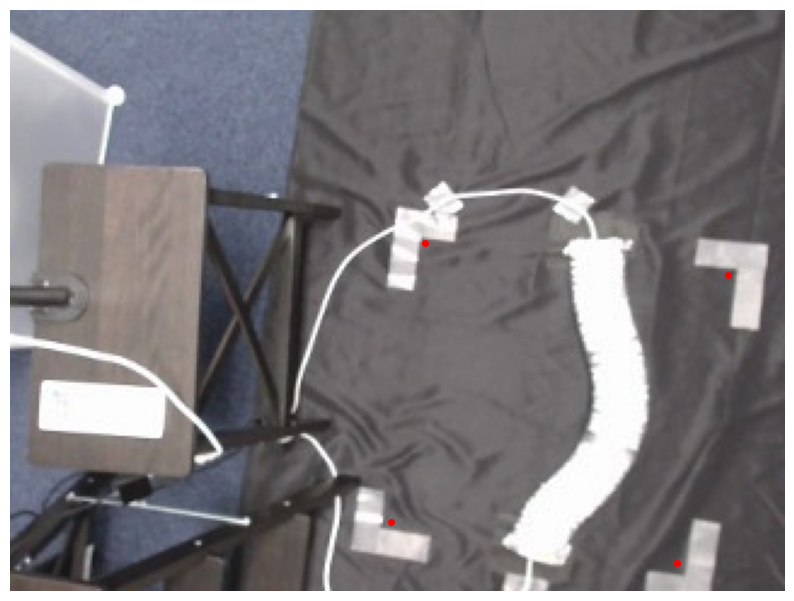

In [63]:
plt.figure(figsize=(10, 10))  # 図のサイズを指定
plt.imshow(sample_image)
plt.axis('off')
for point in corners:
    plt.plot(point[0], point[1], 'ro', markersize=4)
plt.show()

In [64]:
target_width = 200
target_height = 200
images_transformed = apply_perspective_transform(images, corners, target_width, target_height)

Output()

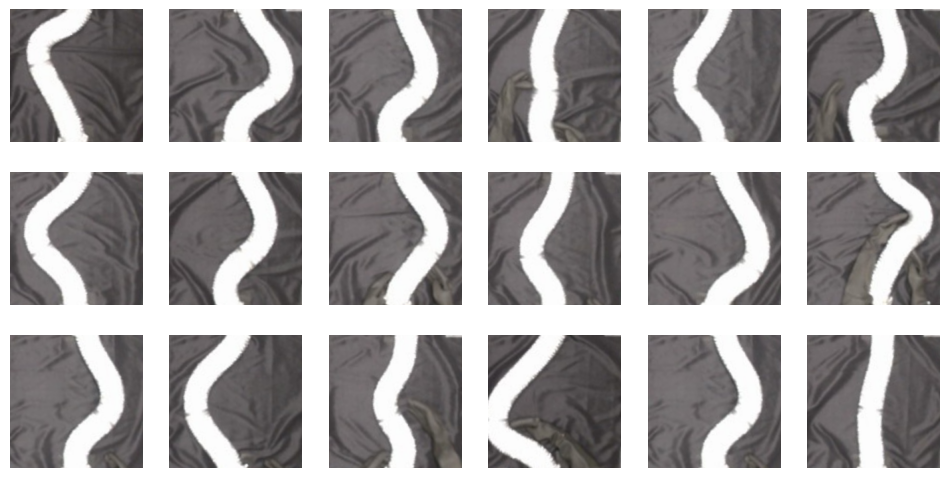

In [65]:
plot_random_images(images_transformed, N=3, M=6, random_seed=42)

# Gray Scale

In [66]:
images_grayscale = convert_to_grayscale(images_transformed, contrast=5.0, brightness=-0.5 * 255)

Output()

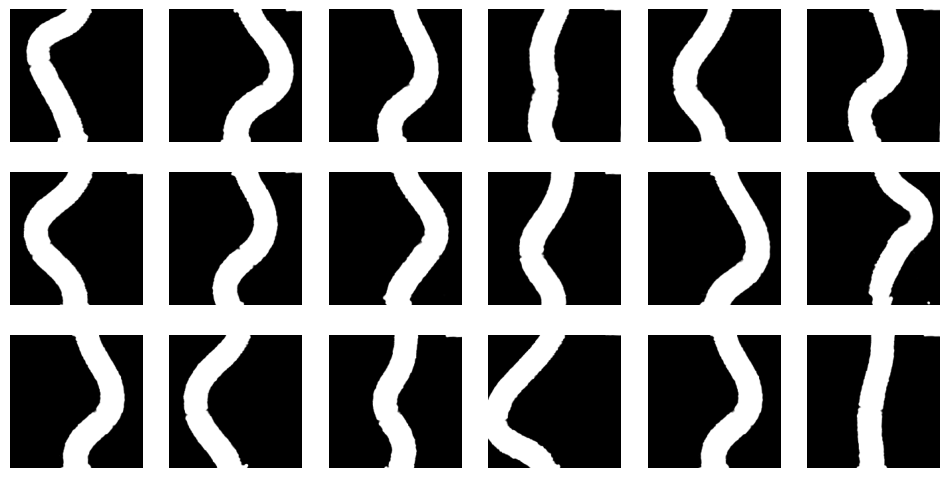

In [67]:
plot_random_images(images_grayscale, N=3, M=6, cmap='gray', random_seed=42)

# Resize

In [68]:
images_reduced = resize_images(images_grayscale, new_width=28, new_height=28)

Output()

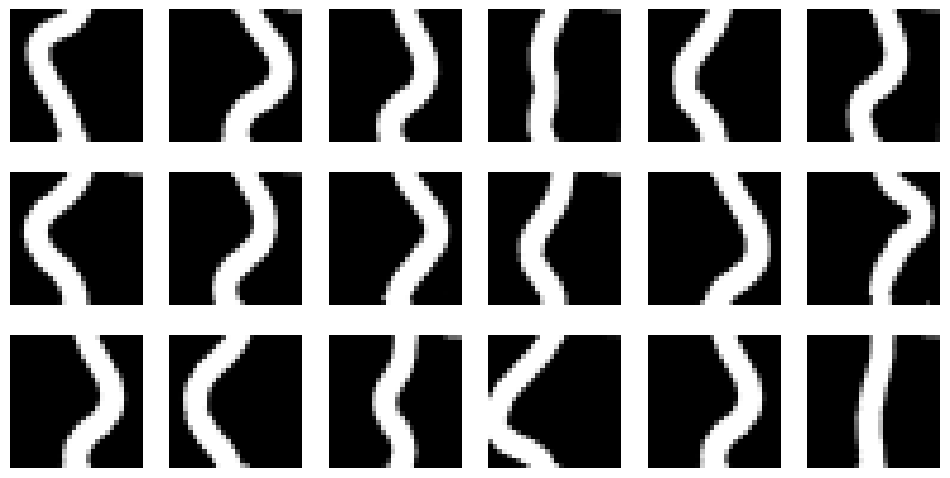

In [69]:
plot_random_images(images_reduced, N=3, M=6, cmap='gray', random_seed=42)

# Normalize

In [70]:
images_normalized = normalize_min_max(images_reduced)

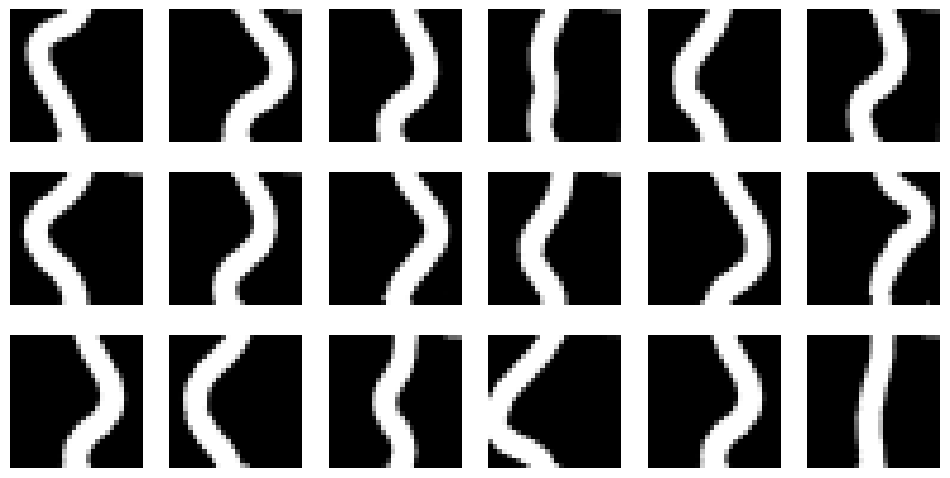

In [71]:
plot_random_images(images_normalized, N=3, M=6, cmap='gray', random_seed=42)

# Binarize

In [72]:
threshold = 0.5
images_binarized = binarize_images(images_normalized, threshold)

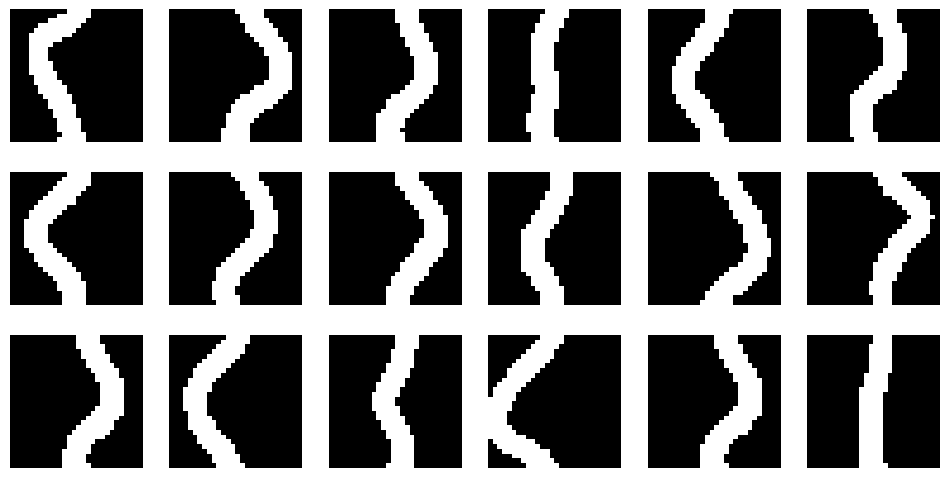

In [73]:
plot_random_images(images_binarized, N=3, M=6, cmap='gray', random_seed=42)

In [74]:
shape_data_dirpath = preprocessed_data_dirpath / 'shape'
save_filepath = shape_data_dirpath / 'shape_514B.npy'
np.save(save_filepath, images_binarized)